In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install sweetviz

In [ ]:
!pip install jupyterthemes

### **Requirements**

In [4]:
import numpy as np 
import pandas as pd 
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, plot_roc_curve)
from sklearn.pipeline import Pipeline

from scipy.stats import boxcox
from scipy import stats
from jupyterthemes import jtplot

In [5]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

## **Extract**

In [6]:
df_org = pd.read_csv('/content/drive/MyDrive/Learn ML/LoanStats3a.csv', nrows=39787)
df_org.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,NaN,May-19,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,NaN,Oct-16,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0

In [7]:
df_org.shape
df = df_org

In [8]:
# Analyzing data

report = sv.analyze(df)

# Generating report
report.show_html('eda_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### **Data Cleaning**

Here data are cleaned by removing null values from the dataset.

Comuns with mean null percentage higher than 70% were removed.

In [9]:
df = df[df.columns[((df.isnull().sum())/len(df)) < 0.3]]

In [10]:
report = sv.analyze(df)

# Generating report
report.show_html('eda_report_after_dropping_null.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda_report_after_dropping_null.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
for col in df.columns:
    if (df[col].nunique()) == 1:
      df.drop(col,inplace=True,axis=1)

print(df.shape)

(39787, 40)


In [12]:
report = sv.analyze(df)

# Generating report
report.show_html('eda_report_after_dropping_single_valued_cols.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda_report_after_dropping_single_valued_cols.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
# From the report we can see that the columns Loan amount, funded amount, funded amount inv, total payment inv have
# more than 90% correlation. Therefore, we will remove those columns
df.drop(['funded_amnt', 'funded_amnt_inv', 'total_pymnt_inv'], axis=1, inplace=True)
print(df.shape)

(39787, 37)


In [14]:
# From reports we can see that there are some columns with almost 1 values. We will remove those columns also
df.drop(['delinq_2yrs', 'revol_util', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'debt_settlement_flag'], axis=1, inplace=True)
print(df.shape)

(39787, 31)


Removing Unnecessary Symbols and Strings

In [15]:
#remove months from term
df['term'] = df['term'].astype(str).map(lambda x: x.lstrip(' ').rstrip('months'))

#Remove percentage mark
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') 

In [16]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000.0,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,Jan-85,1.0,3.0,0.0,13648.0,9.0,5863.155187,5000.00,863.16,Jan-15,171.62,May-19,0.0
1,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,Apr-99,5.0,3.0,0.0,1687.0,4.0,1014.530000,456.46,435.17,Apr-13,119.66,Oct-16,0.0
2,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,Nov-01,2.0,2.0,0.0,2956.0,10.0,3005.666844,2400.00,605.67,Jun-14,649.91,Jun-17,0.0
3,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,Feb-96,1.0,10.0,0.0,5598.0,37.0,12231.890000,10000.00,2214.92,Jan-15,357.48,Apr-16,0.0
4,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Fully Paid,other,Personal,972xx,OR,17.94,Jan-96,0.0,15.0,0.0,27783.0,38.0,4066.908161,3000.00,1066.91,Jan-17,67.30,Apr-18,0.0


Converting time data to numcerical values.

In [17]:
col = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
for i in col:
    df[i] = pd.to_datetime(df[i].str.upper(), format='%b-%y', yearfirst=False)

In [18]:
df['issue_d_year'] = pd.DatetimeIndex(df['issue_d']).year  
df['issue_d_month'] = pd.DatetimeIndex(df['issue_d']).month  
df['last_pymnt_d_year'] = pd.DatetimeIndex(df['last_pymnt_d']).year  
df['last_pymnt_d_month'] = pd.DatetimeIndex(df['last_pymnt_d']).month 
df['last_credit_pull_d_year'] = pd.DatetimeIndex(df['last_credit_pull_d']).year  
df['last_credit_pull_d_month'] = pd.DatetimeIndex(df['last_credit_pull_d']).month 

In [19]:
df.earliest_cr_line = 2021 - pd.DatetimeIndex(df['earliest_cr_line']).year 
df.issue_d_year = 2021 - (df.issue_d_year)

df.last_pymnt_d_year = 2021 - (df.last_pymnt_d_year)
df.last_credit_pull_d_year = 2021 - (df.last_credit_pull_d_year)

In [20]:
df.drop(['issue_d','last_pymnt_d','last_credit_pull_d'],axis=1,inplace=True)

In [21]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
0,5000.0,36,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,860xx,AZ,27.65,36.0,1.0,3.0,0.0,13648.0,9.0,5863.155187,5000.00,863.16,171.62,0.0,10.0,12.0,6.0,1.0,2.0,5.0
1,2500.0,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,bike,309xx,GA,1.00,22.0,5.0,3.0,0.0,1687.0,4.0,1014.530000,456.46,435.17,119.66,0.0,10.0,12.0,8.0,4.0,5.0,10.0
2,2400.0,36,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,606xx,IL,8.72,20.0,2.0,2.0,0.0,2956.0,10.0,3005.666844,2400.00,605.67,649.91,0.0,10.0,12.0,7.0,6.0,4.0,6.0
3,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,personel,917xx,CA,20.00,25.0,1.0,10.0,0.0,5598.0,37.0,12231.890000,10000.00,2214.92,357.48,0.0,10.0,12.0,6.0,1.0,5.0,4.0
4,3000.0,60,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Fully Paid,other,Personal,972xx,OR,17.94,25.0,0.0,15.0,0.0,27783.0,38.0,4066.908161,3000.00,1066.91,67.30,0.0,10.0,12.0,4.0,1.0,3.0,4.0


Remove rows with null values 

In [22]:
df.isnull().sum()

loan_amnt                      1
term                           0
int_rate                       1
installment                    1
grade                          1
sub_grade                      1
emp_title                   2468
emp_length                  1079
home_ownership                 1
annual_inc                     1
verification_status            1
loan_status                    1
purpose                        1
title                         12
zip_code                       1
addr_state                     1
dti                            1
earliest_cr_line               1
inq_last_6mths                 1
open_acc                       1
pub_rec                        1
revol_bal                      1
total_acc                      1
total_pymnt                    1
total_rec_prncp                1
total_rec_int                  1
last_pymnt_amnt                1
pub_rec_bankruptcies         698
issue_d_year                   1
issue_d_month                  1
last_pymnt

In [23]:
df = df.dropna(axis = 0, how ='any') 

In [24]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
title                       0
zip_code                    0
addr_state                  0
dti                         0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
total_pymnt                 0
total_rec_prncp             0
total_rec_int               0
last_pymnt_amnt             0
pub_rec_bankruptcies        0
issue_d_year                0
issue_d_month               0
last_pymnt_d_year           0
last_pymnt_d_month          0
last_credit_pull_d_year     0
last_credi

In [25]:
report = sv.analyze(df)

# Generating report
report.show_html('eda_report_6.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda_report_6.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36536 entries, 1 to 39749
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 36536 non-null  float64
 1   term                      36536 non-null  object 
 2   int_rate                  36536 non-null  float64
 3   installment               36536 non-null  float64
 4   grade                     36536 non-null  object 
 5   sub_grade                 36536 non-null  object 
 6   emp_title                 36536 non-null  object 
 7   emp_length                36536 non-null  object 
 8   home_ownership            36536 non-null  object 
 9   annual_inc                36536 non-null  float64
 10  verification_status       36536 non-null  object 
 11  loan_status               36536 non-null  object 
 12  purpose                   36536 non-null  object 
 13  title                     36536 non-null  object 
 14  zip_co

In [27]:
report = sv.analyze(df)

# Generating report
report.show_html('eda_report_5.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda_report_5.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Loan Grades

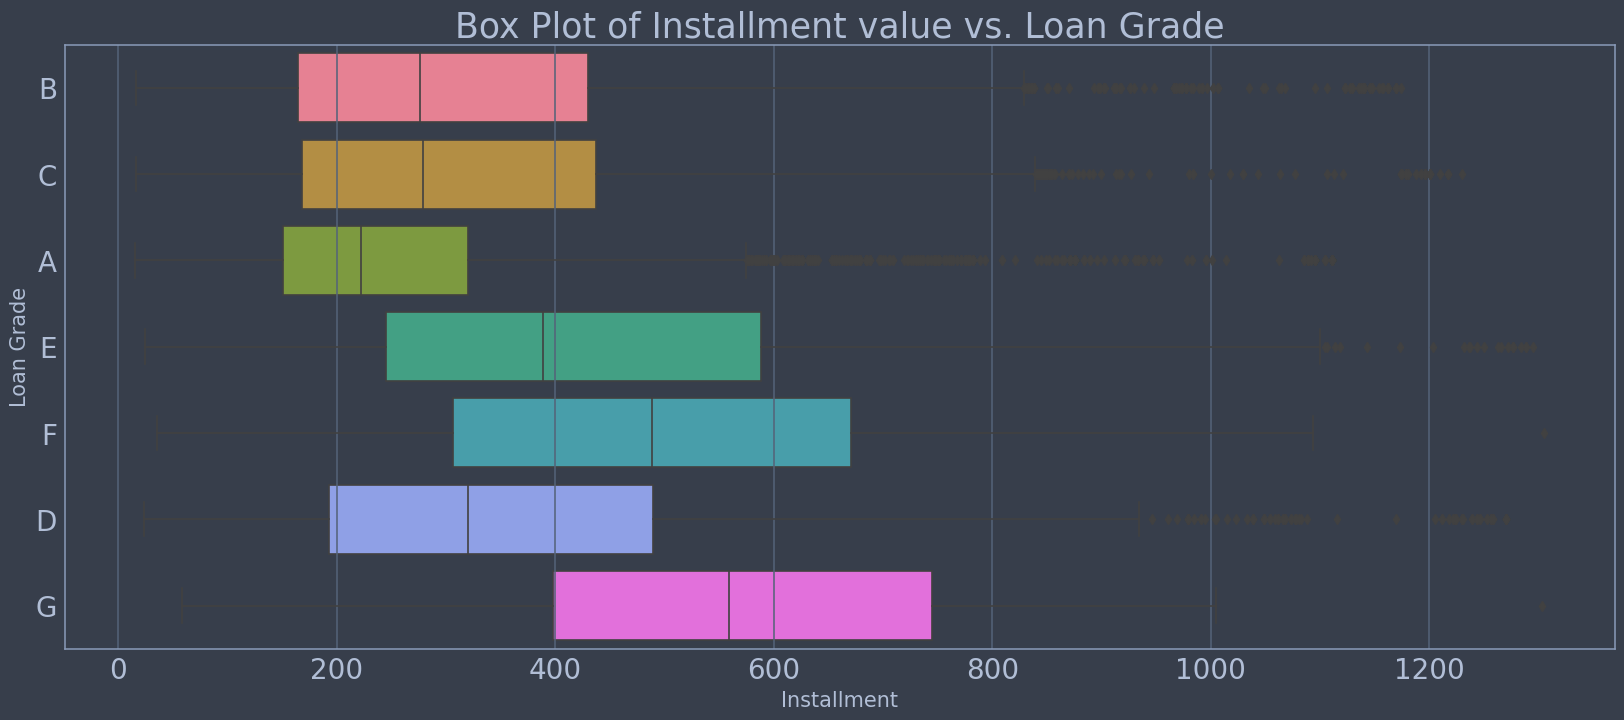

In [ ]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(20,8))
sns.boxplot(x="installment", y="grade", data=df, palette="husl")
plt.title('Box Plot of Installment value vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

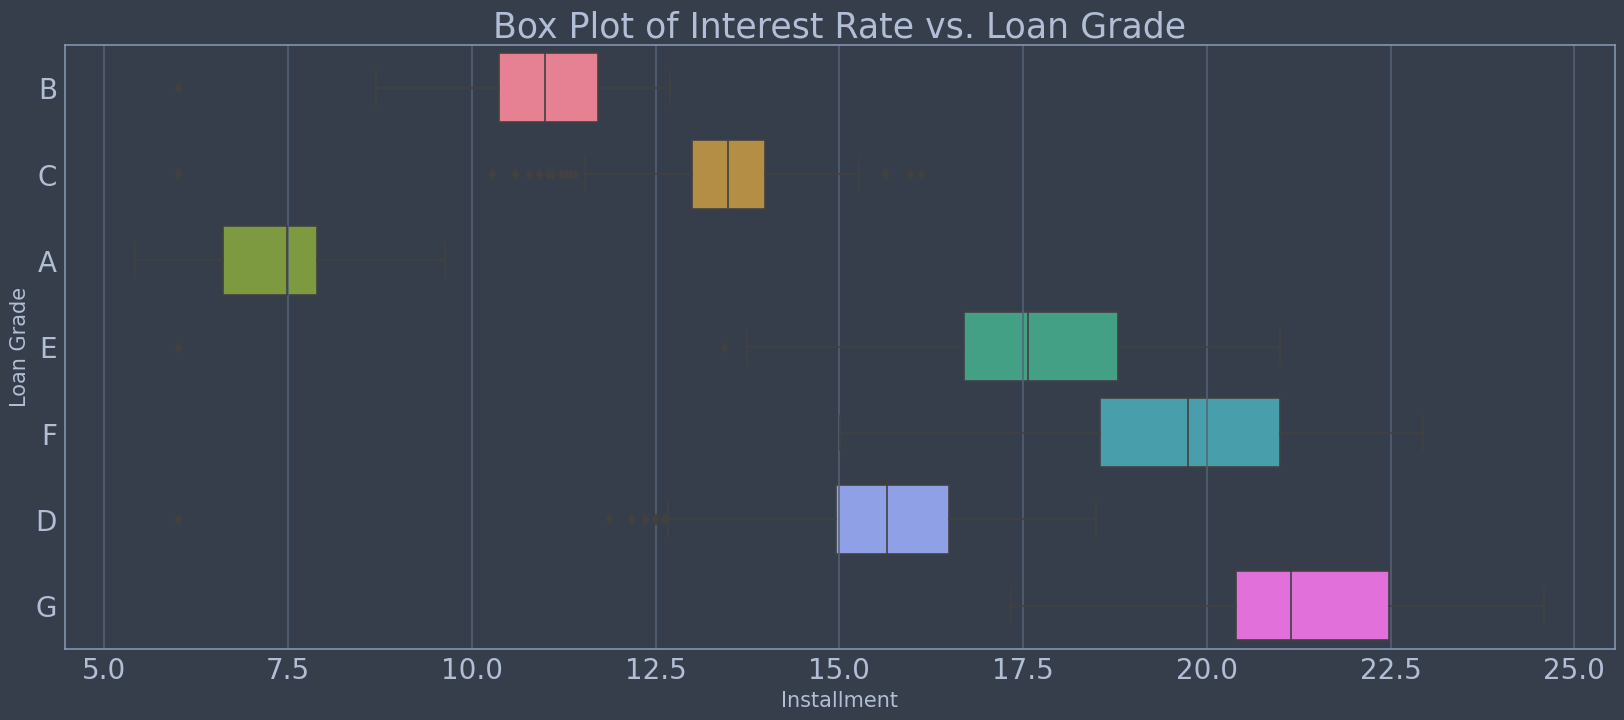

In [ ]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(20,8))
sns.boxplot(x="int_rate", y="grade", data=df, palette="husl")
plt.title('Box Plot of Interest Rate vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

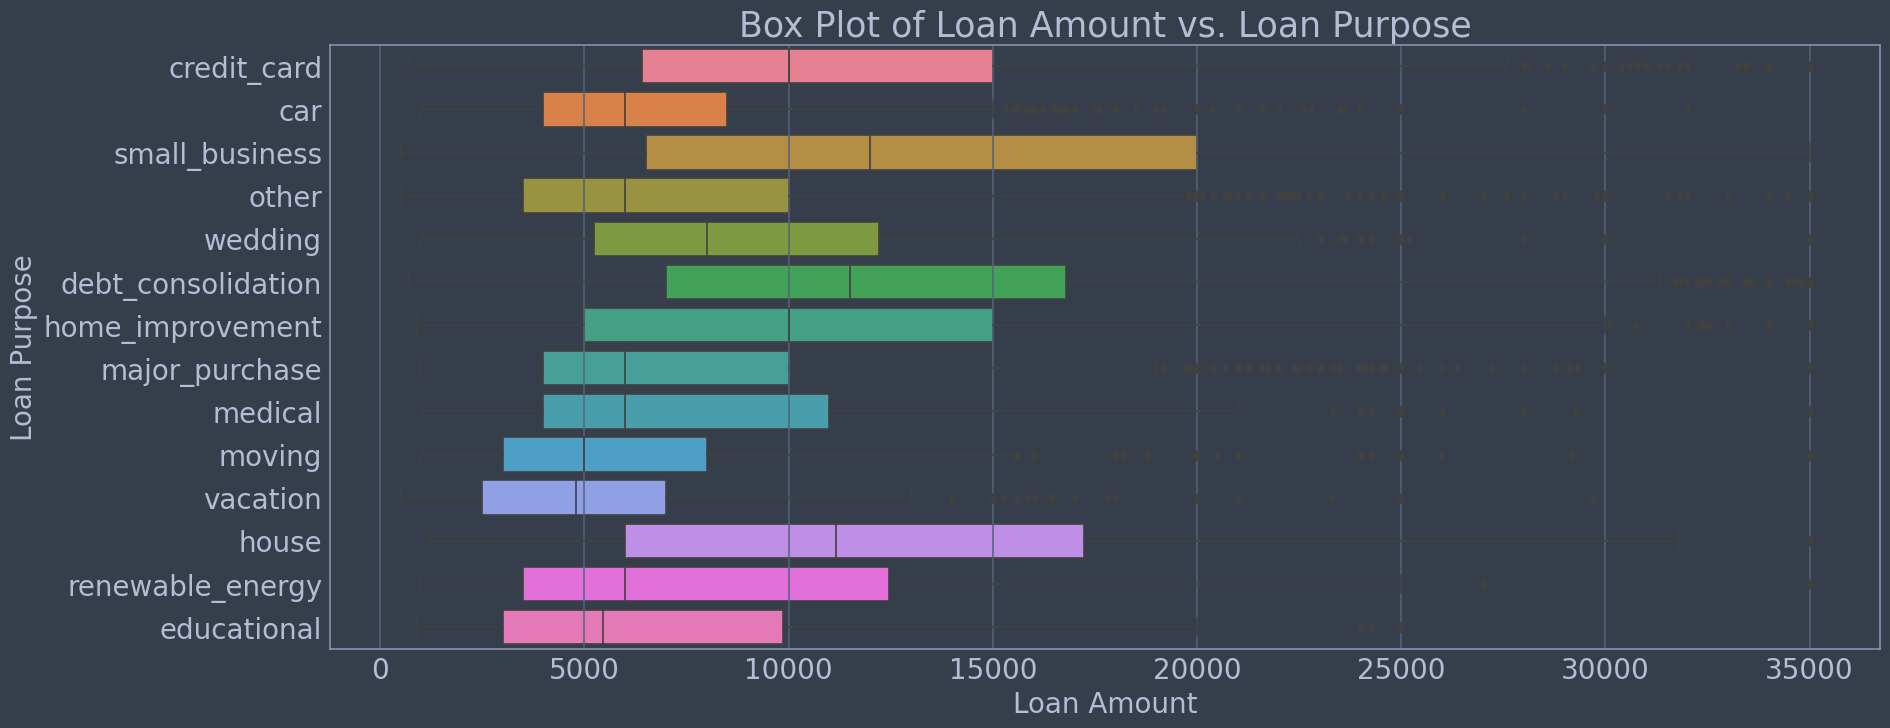

In [ ]:
# Plot the borrower's Loan Amount compared to Loan Purpose
plt.figure(figsize=(20,8))
sns.boxplot(x="loan_amnt", y="purpose", data=df, palette="husl")
plt.title('Box Plot of Loan Amount vs. Loan Purpose', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Converting categorical columns to Numerical using Orinal Encoder

In [29]:
col_lst_unique = df.columns[df.dtypes == 'object']
col_lst_unique

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'purpose',
       'title', 'zip_code', 'addr_state'],
      dtype='object')

In [30]:
col_lst_unique = df.columns[df.dtypes == 'object']

ord_enc = OrdinalEncoder()
for col in col_lst_unique:
  df[col] = ord_enc.fit_transform(df[[col]])

In [89]:
df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
1,2500.0,1.0,15.27,59.83,2.0,13.0,18641.0,10.0,3.0,30000.0,1.0,0.0,0.0,14933.0,275.0,10.0,1.00,22.0,5.0,3.0,0.0,1687.0,4.0,1014.530000,456.46,435.17,119.66,0.0,10.0,12.0,8.0,4.0,5.0,10.0
3,10000.0,0.0,13.49,339.31,2.0,10.0,326.0,1.0,3.0,49200.0,1.0,1.0,9.0,17252.0,732.0,4.0,20.00,25.0,1.0,10.0,0.0,5598.0,37.0,12231.890000,10000.00,2214.92,357.48,0.0,10.0,12.0,6.0,1.0,5.0,4.0
4,3000.0,1.0,12.69,67.79,1.0,9.0,23239.0,0.0,3.0,80000.0,1.0,1.0,9.0,11437.0,781.0,35.0,17.94,25.0,0.0,15.0,0.0,27783.0,38.0,4066.908161,3000.00,1066.91,67.30,0.0,10.0,12.0,4.0,1.0,3.0,4.0
5,5000.0,0.0,7.90,156.46,0.0,3.0,23621.0,3.0,3.0,36000.0,1.0,1.0,13.0,9886.0,690.0,3.0,11.20,17.0,3.0,9.0,0.0,7963.0,12.0,5632.210000,5000.00,632.21,161.03,0.0,10.0,12.0,6.0,1.0,4.0,2.0
6,7000.0,1.0,15.96,170.08,2.0,14.0,20149.0,8.0,3.0,47004.0,0.0,1.0,2.0,8526.0,246.0,26.0,23.51,16.0,1.0,7.0,0.0,17726.0,11.0,10137.840010,7000.00,3137.84,1313.76,0.0,10.0,12.0,5.0,5.0,3.0,12.0
7,3000.0,0.0,18.64,109.43,4.0,20.0,13425.0,9.0,3.0,48000.0,1.0,1.0,0.0,2199.0,717.0,4.0,5.35,14.0,2.0,4.0,0.0,8221.0,4.0,3939.135294,3000.00,939.14,111.34,0.0,10.0,12.0,6.0,1.0,7.0,12.0
9,5375.0,1.0,12.69,121.45,1.0,9.0,20497.0,10.0,3.0,15000.0,2.0,0.0,9.0,1708.0,624.0,41.0,18.08,17.0,0.0,2.0,0.0,9279.0,3.0,1484.590000,673.48,533.42,121.45,0.0,10.0,12.0,9.0,11.0,5.0,12.0
10,6500.0,1.0,14.65,153.45,2.0,12.0,20176.0,5.0,2.0,72000.0,0.0,1.0,2.0,7043.0,691.0,3.0,16.12,23.0,2.0,14.0,0.0,4032.0,23.0,7678.017673,6500.00,1178.02,1655.54,0.0,10.0,12.0,8.0,6.0,3.0,12.0
11,12000.0,0.0,12.69,402.54,1.0,9.0,22654.0,1.0,2.0,75000.0,1.0,1.0,2.0,3166.0,728.0,4.0,10.78,32.0,0.0,12.0,0.0,23336.0,34.0,13947.989160,12000.00,1947.99,6315.30,0.0,10.0,12.0,8.0,9.0,3.0,11.0
12,9000.0,0.0,13.49,305.38,2.0,10.0,23516.0,10.0,3.0,30000.0,1.0,0.0,2.0,15943.0,212.0,43.0,10.08,17.0,1.0,4.0,0.0,10452.0,9.0,2277.320000,1256.14,570.26,305.38,0.0,10.0,12.0,9.0,7.0,5.0,10.0


### Data Warehousing

In [31]:
df.to_csv('Cleaned_dataset.csv')

Heat Map

<Figure size 800x800 with 0 Axes>

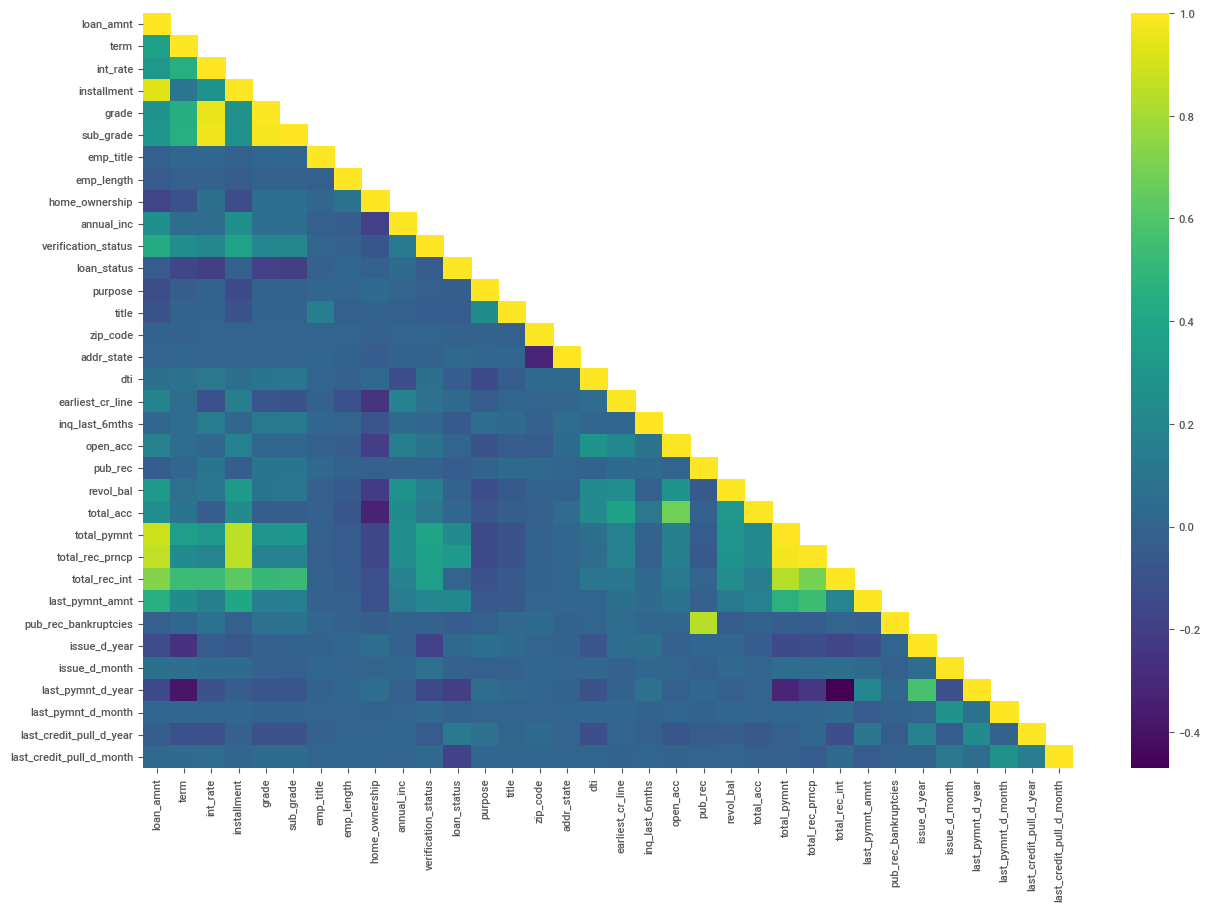

In [32]:
#Heat Map
plt.figure(figsize=(8, 8))

corr_mat = df.corr()
np.tril(np.ones(corr_mat.shape)).astype(np.bool)[0:5,0:5]
df_lt = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))
plt.subplots(figsize=(15,10))
sns.heatmap(df_lt, annot=False, cmap="viridis")
plt.show()

Model Preparation

In [96]:
Y = df['loan_status']
X = df.drop('loan_status', axis = 1)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)   #Split the train data set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29228, 33), (7308, 33), (29228,), (7308,))

In [98]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
1,2500.0,1.0,15.27,59.83,2.0,13.0,18641.0,10.0,3.0,30000.0,1.0,0.0,0.0,14933.0,275.0,10.0,1.00,22.0,5.0,3.0,0.0,1687.0,4.0,1014.530000,456.46,435.17,119.66,0.0,10.0,12.0,8.0,4.0,5.0,10.0
3,10000.0,0.0,13.49,339.31,2.0,10.0,326.0,1.0,3.0,49200.0,1.0,1.0,9.0,17252.0,732.0,4.0,20.00,25.0,1.0,10.0,0.0,5598.0,37.0,12231.890000,10000.00,2214.92,357.48,0.0,10.0,12.0,6.0,1.0,5.0,4.0
4,3000.0,1.0,12.69,67.79,1.0,9.0,23239.0,0.0,3.0,80000.0,1.0,1.0,9.0,11437.0,781.0,35.0,17.94,25.0,0.0,15.0,0.0,27783.0,38.0,4066.908161,3000.00,1066.91,67.30,0.0,10.0,12.0,4.0,1.0,3.0,4.0
5,5000.0,0.0,7.90,156.46,0.0,3.0,23621.0,3.0,3.0,36000.0,1.0,1.0,13.0,9886.0,690.0,3.0,11.20,17.0,3.0,9.0,0.0,7963.0,12.0,5632.210000,5000.00,632.21,161.03,0.0,10.0,12.0,6.0,1.0,4.0,2.0
6,7000.0,1.0,15.96,170.08,2.0,14.0,20149.0,8.0,3.0,47004.0,0.0,1.0,2.0,8526.0,246.0,26.0,23.51,16.0,1.0,7.0,0.0,17726.0,11.0,10137.840010,7000.00,3137.84,1313.76,0.0,10.0,12.0,5.0,5.0,3.0,12.0


In [102]:
#Normalize Numerical Columns
from sklearn.preprocessing import StandardScaler
columns = ['loan_amnt','int_rate', 'installment', 'emp_title', 'emp_length', 'sub_grade',
           'annual_inc', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
           'open_acc','pub_rec','revol_bal', 'total_acc', 'total_pymnt','total_rec_prncp',
           'total_rec_int', 'last_pymnt_amnt', 'issue_d_year', 'issue_d_month', 'last_pymnt_d_year', 'last_pymnt_d_month',
           'last_credit_pull_d_month', 'last_credit_pull_d_year']

stan_scaler = StandardScaler()
for col in columns:
  X_train[[col]] = stan_scaler.fit_transform(X_train[[col]])
  X_test[[col]] = stan_scaler.transform(X_test[[col]])
  


In [106]:
X_train.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_rec_prncp,total_rec_int,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
13906,0.496013,0.0,-0.021526,0.827600,1.0,-0.143441,-0.335377,-1.246077,3.0,0.355454,1.0,2.0,-0.899664,-1.236650,0.746518,0.195603,-0.596629,0.0,-0.078282,-0.227149,-0.274741,-0.724456,0.571317,0.704835,0.116562,-0.614015,0.0,-0.774831,-0.358193,-0.080629,0.417617,-1.061449,-0.152630
20067,0.496013,1.0,2.052460,0.331888,5.0,2.792487,-1.163002,0.008693,3.0,0.352399,2.0,4.0,-0.271594,-1.278509,0.746518,-0.837531,0.418370,1.0,-0.078282,-0.227149,-0.245616,-0.636732,0.696766,0.704835,0.551173,-0.508687,0.0,-0.774831,-1.551474,0.585457,1.578335,-1.061449,-0.152630
35985,1.168755,0.0,0.460174,1.710920,2.0,0.590541,0.020362,-0.932384,0.0,0.772378,2.0,2.0,-0.997190,1.446111,1.653033,0.237710,1.288369,1.0,2.661861,-0.227149,0.724266,1.644074,1.272726,1.406844,0.654663,1.110366,0.0,1.704560,-0.059872,1.251543,0.417617,-0.676248,-0.473340
12973,-0.176728,0.0,-1.359581,-0.084914,0.0,-1.171016,-1.363151,0.636078,0.0,0.085140,1.0,2.0,-0.790434,0.163713,0.049200,0.312902,-0.161629,0.0,-0.306627,-0.227149,-0.027274,-0.022669,-0.178792,0.002824,-0.590255,0.758958,0.0,-0.774831,-0.358193,0.585457,1.288155,-1.061449,-0.152630
24629,0.630562,1.0,-1.380990,-0.658378,0.0,-0.877424,-0.931564,-1.246077,3.0,-0.509367,2.0,9.0,0.252902,-0.810452,1.513569,0.723449,-0.016629,0.0,-0.534972,-0.227149,-0.667834,0.328224,-0.110104,-0.053337,-0.200938,-0.573508,0.0,0.464865,0.835089,-1.412800,1.288155,-0.676248,0.809499


ML Models

Logistic Regression

In [118]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
ypred = lr.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation

0.9930313588850175

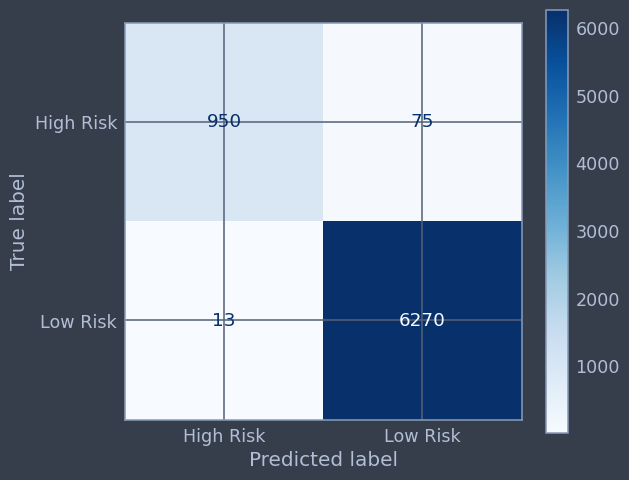

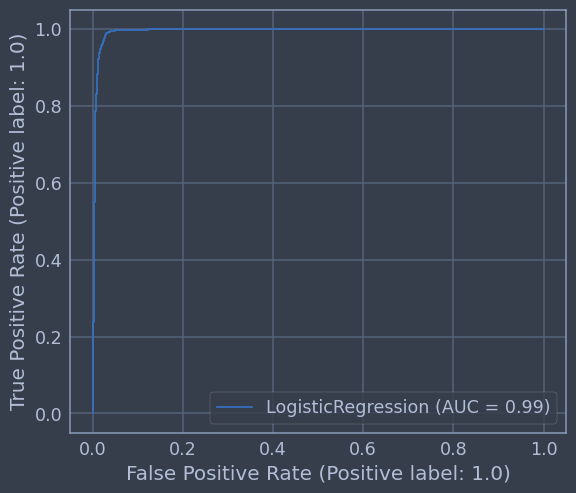

In [119]:
disp = plot_confusion_matrix(
    lr, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['High Risk', 'Low Risk']
)

disp = plot_roc_curve(lr, X_test, y_test)

Random Forest

In [116]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
ypred = rf_clf.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation

0.9904626783321511

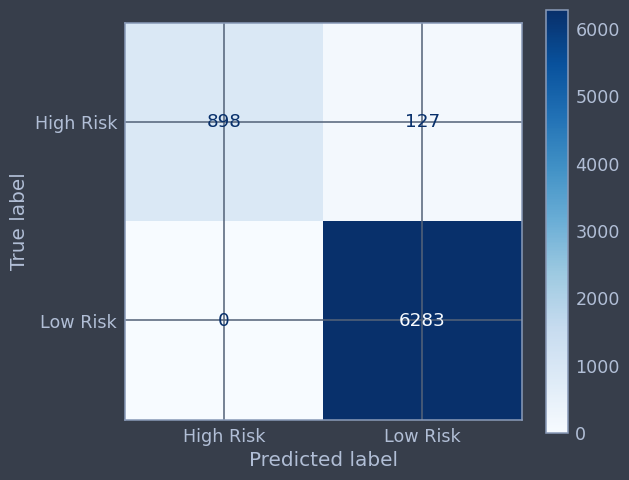

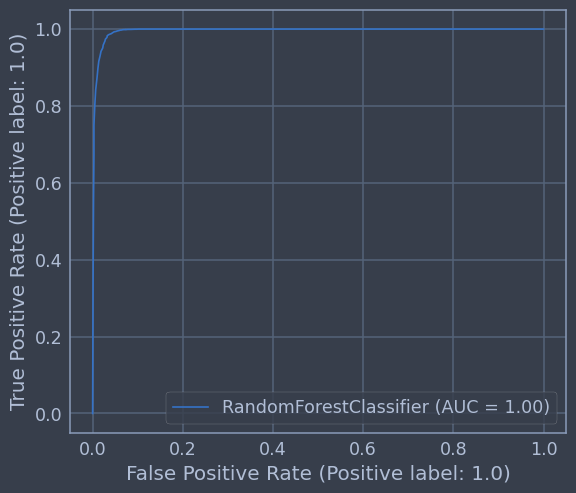

In [110]:
disp = plot_confusion_matrix(
    rf_clf, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['High Risk', 'Low Risk']
)

disp = plot_roc_curve(rf_clf, X_test, y_test)

[0.07703509 0.01405467 0.01801752 0.09108803 0.00795623 0.01258405
 0.00973497 0.0044283  0.00170771 0.0097213  0.00259718 0.00501783
 0.00923641 0.00889334 0.00599039 0.00936921 0.00726185 0.00366224
 0.00606695 0.00084124 0.01006928 0.00772654 0.099202   0.24724599
 0.04079022 0.08953429 0.00078357 0.0106845  0.0066885  0.04878434
 0.00925973 0.05933655 0.06462997]


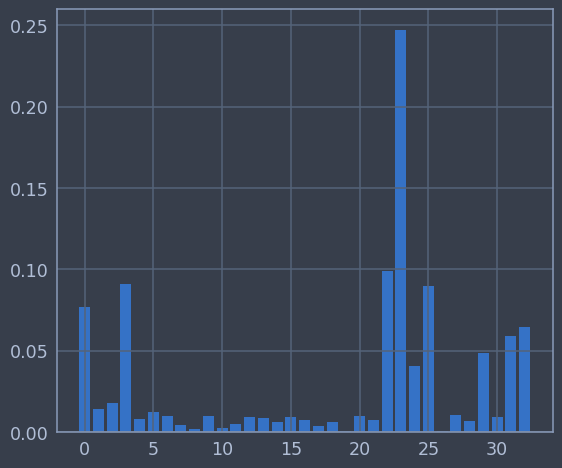

In [117]:
# feature importance
print(rf_clf.feature_importances_)
# plot
plt.bar(range(len(rf_clf.feature_importances_)), rf_clf.feature_importances_)
plt.show()

Decision Tree

In [121]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
ypred = dt.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation

0.987369926125983

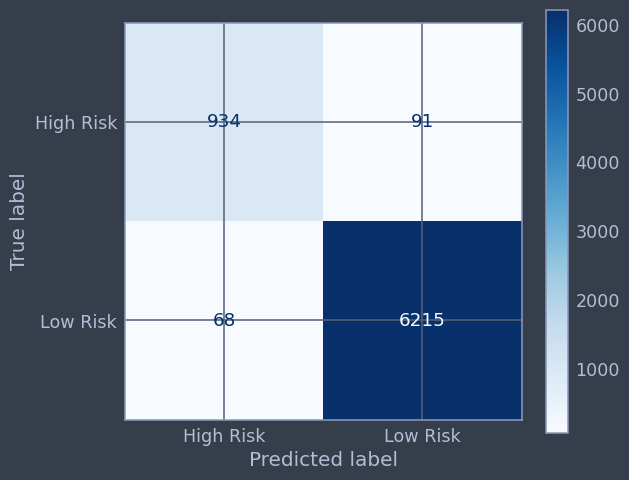

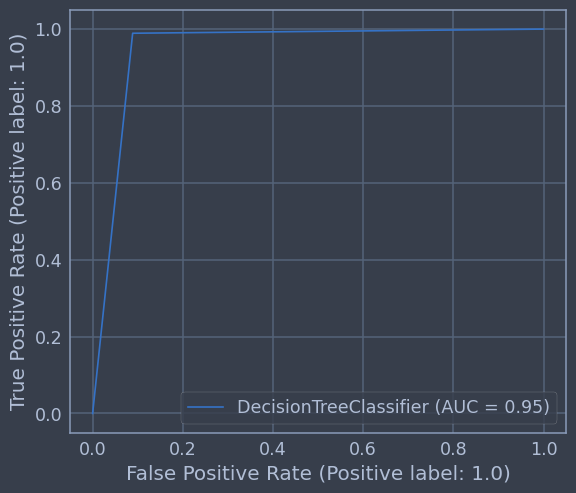

In [122]:
disp = plot_confusion_matrix(
    dt, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['High Risk', 'Low Risk']
)

disp = plot_roc_curve(dt, X_test, y_test)

[0.22862789 0.00527173 0.00238766 0.0877383  0.00098576 0.00269363
 0.0025105  0.00154391 0.         0.00419655 0.00078198 0.00266191
 0.00302399 0.0023588  0.00209164 0.00376528 0.00415047 0.00101675
 0.00162067 0.00041293 0.00248835 0.00102917 0.00277892 0.39289863
 0.01777367 0.0362809  0.         0.00104385 0.0020253  0.01664824
 0.00377431 0.07332004 0.09209824]


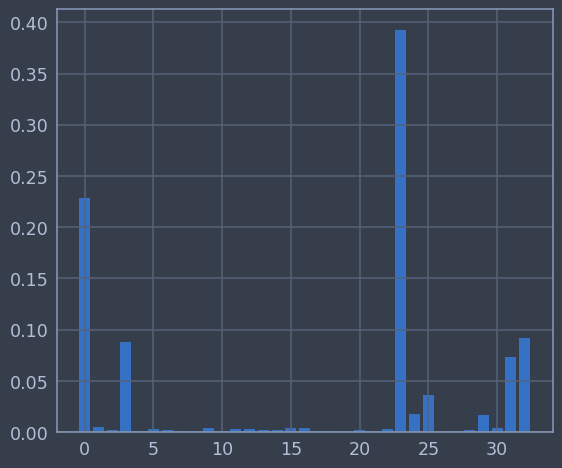

In [123]:
# feature importance
print(dt.feature_importances_)
# plot
plt.bar(range(len(dt.feature_importances_)), dt.feature_importances_)
plt.show()

XGBoost

In [113]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
ypred = xgb_clf.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation

0.9926534481396635

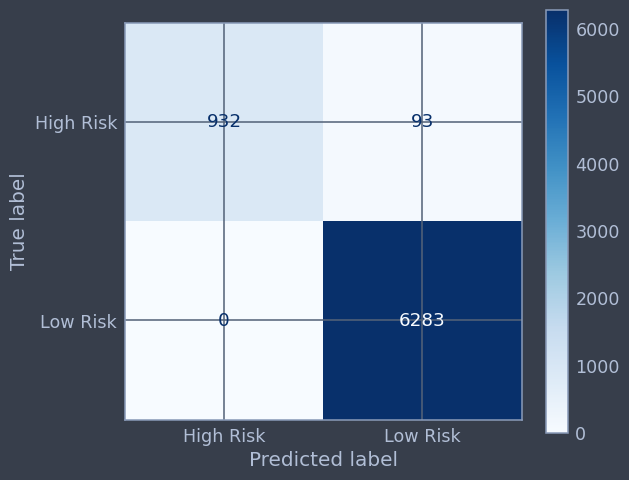

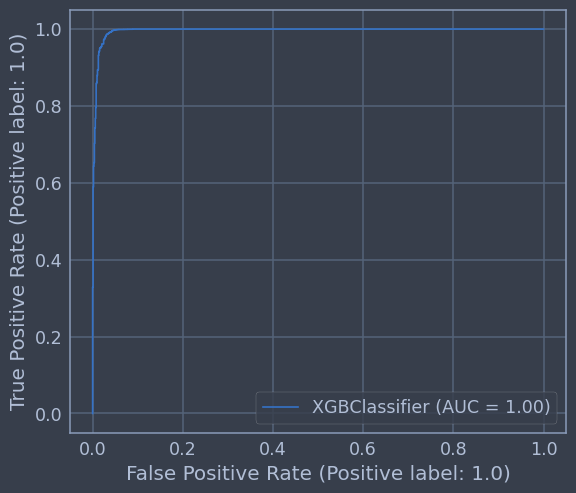

In [114]:
disp = plot_confusion_matrix(
    xgb_clf, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['High Risk', 'Low Risk']
)

disp = plot_roc_curve(xgb_clf, X_test, y_test)

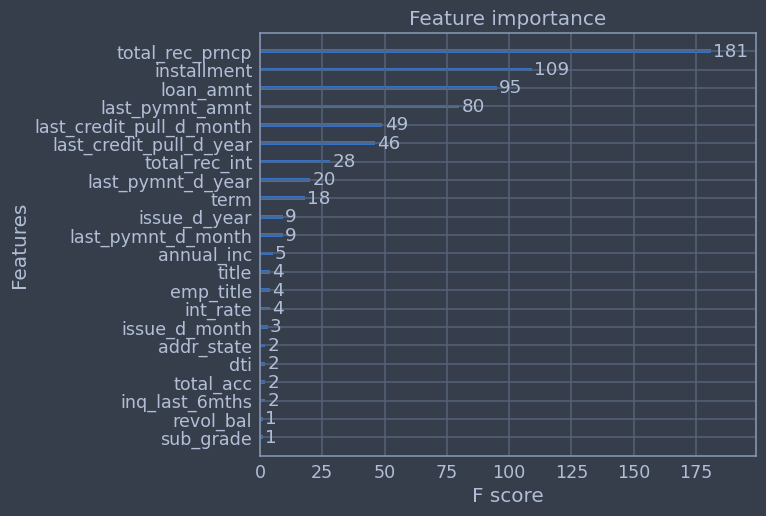

In [115]:
from xgboost import plot_importance
# plot feature importance
plot_importance(xgb_clf)
plt.show()

Model Deployment

In [ ]:
from sklearn.compose import ColumnTransformer 
pre_process = ColumnTransformer([('scale_data', StandardScaler(),['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','recoveries','last_pymnt_amnt','pub_rec_bankruptcies'])])

In [ ]:
# define the stages of the pipeline
pipeline = Pipeline(steps= [
                            ('Scaling', pre_process),
                            ('model', LogisticRegression())])

# fit the pipeline model with the training data                            
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('Scaling',
                 ColumnTransformer(transformers=[('scale_data',
                                                  StandardScaler(),
                                                  ['loan_amnt', 'funded_amnt',
                                                   'funded_amnt_inv',
                                                   'int_rate', 'installment',
                                                   'annual_inc', 'dti',
                                                   'delinq_2yrs',
                                                   'inq_last_6mths', 'open_acc',
                                                   'pub_rec', 'revol_bal',
                                                   'revol_util', 'total_acc',
                                                   'total_pymnt',
                                                   'total_pymnt_inv',
                                                   'total_rec_int',
                                     

In [ ]:
pipeline.predict(X_test)

array([0., 1., 1., ..., 1., 1., 1.])

In [ ]:
# import joblib
from joblib import dump

# dump the pipeline model
dump(pipeline, filename="Identifying_Defaulters.joblib")

['Identifying_Defaulters.joblib']

In [ ]:
test_file = pd.read_csv('/content/Test_file.csv')

In [ ]:
test_file.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month
0,5000,5000,4975,0,10.65,162.87,1,6,1,4,24000,2,1,27.65,0,36,1,3,0,13648,83.7,9,5863.155187,5833.84,5000.00,863.16,0.00,0.0,171.62,0,10,12,6,1,2,5
1,2500,2500,2500,1,15.27,59.83,2,13,10,4,30000,1,0,1.00,0,22,5,3,0,1687,9.4,4,1014.530000,1014.53,456.46,435.17,0.00,122.9,119.66,0,10,12,8,4,5,10
2,2400,2400,2400,0,15.96,84.33,2,14,1,4,12252,0,11,8.72,0,20,2,2,0,2956,98.5,10,3005.666844,3005.67,2400.00,605.67,0.00,0.0,649.91,0,10,12,7,6,4,6
3,10000,10000,10000,0,13.49,339.31,2,10,1,4,49200,1,9,20.00,0,25,1,10,0,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,357.48,0,10,12,6,1,5,4
4,3000,3000,3000,1,12.69,67.79,1,9,0,4,80000,1,9,17.94,0,25,0,15,0,27783,53.9,38,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,67.30,0,10,12,4,1,3,4


In [ ]:
# import joblib
from joblib import load

# load the saved pipleine model
pipeline = load("Identifying_Defaulters.joblib")

# predict on the sample tweet text
pipeline.predict(test_file)

array([1., 0., 1., 1., 1., 1.])

In [ ]:
!pip install flask-ngrok


from flask import Flask
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)   
  
@app.route("/")
def home():
    return "<h1>GFG is great platform to learn</h1>"
    
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://ce99-35-199-40-121.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040
